# R Assessment for DataStar Trainees

- Kuala Lumpur weather data is provided in Kuala Lumpur-Weather.csv. <br>
- It provides hourly data for 7 years from 1st January 2009 to 31st December 2016.
- Please follow the steps below and write a piece of code for the described purposes.

## Question 1.
-    1.1. Read the data and save it in a dataframe called data.
-    1.2. How many rows of data do you have?
-    1.3. How many columns are there in the data?

In [1]:
# Your Code Is Here Question 1
data = read.csv("Kuala_LumpurWeather.csv")
nrow(data)
ncol(data)

[1] 70080

[1] 25

## Question 2.
-    2.1. How many distinct values are in column "winddir16Point"

In [2]:
# Your Code Is Here for Question 2
length(unique(data$winddir16Point))

[1] 16

## Question 3.
-    3.1. What is average of "tempC" in 2015.
-    3.2. What is average of "tempC" on Feb 2015.
-    3.3. What is average of "tempC" on Feb 2015, at 8a.m.

In [3]:
# Your Code Is Here for Question 3
mean(data[substr(data$date, 1, 4)=="2015",]$tempC)
mean(data[substr(data$date, 1, 7)=="2015-02",]$tempC)
mean(data[substr(data$date, 1, 7)=="2015-02" & data$time == 800,]$tempC)

[1] 28.93231

[1] 28.46131

[1] 24.96429

## Question 4.
-    4.1. How many times wind direction was "NE" on January 2011.
-    4.2. How many times wind direction was "NE" on January 2011 when tempC was less than 26.
-    4.3. What percentage of times tempC was greater than 32 in 2011.

In [4]:
# Your Code Is Here for Question 4
nrow(data[substr(data$date, 1, 7)=="2011-01" & data$winddir16Point == "NE",])
nrow(data[substr(data$date, 1, 7)=="2011-01" & data$winddir16Point == "NE" & data$tempC < 26,])
nrow(data[substr(data$date, 1, 4)=="2011" & data$tempC > 32,])/nrow(data[substr(data$date, 1, 4)=="2011",])*100

[1] 218

[1] 187

[1] 4.680365

## Question 5.
-    5.1. How many rows of data have missing values (NA and NaN).<br><br>
-    5.2. You need to replace 100 of values with NA randomly. To this end, write a piece of code that randomly selects a row of data and then randomly selects a column of the selected row, and then assign NA to that. Make sure column "X" does not get any NA.<br><br>
-    5.3. After adding 100 NAs to the data, How many missing values are there in every column of data. To do so, write a piece of code to show name of columns and number of missing values against each of them.

In [5]:
# Your Code Is Here for Question 5
n = nrow(data) - sum(complete.cases(data))
n
i = 1
data_NA = data
while (i <= 100){
    rnd_row = sample(1:nrow(data_NA), 1)
    rnd_col = sample(2:ncol(data_NA), 1)
    #rnd_row
    #rnd_col
    if ( !is.na( data_NA[rnd_row, rnd_col] ) ) {
        data_NA[rnd_row, rnd_col] = NA
        i = i + 1
    }
    else {
        next # retry because selected cell is already NA
    }
}
apply(X = data_NA, MARGIN = 2, FUN = function(x){sum(is.na(x))})

[1] 0

X             city             date             time 
               0                3                4                4 
           tempC            tempF   windspeedMiles    windspeedKmph 
               5                5                1                5 
   winddirDegree   winddir16Point      weatherCode weatherDescValue 
               3                5                3                3 
        precipMM         humidity       visibility         pressure 
               4                4                6                4 
      cloudcover       HeatIndexC       HeatIndexF       WindChillC 
               4                7                5                4 
      WindChillF     WindGustKmph    WindGustMiles       FeelsLikeC 
               4                4                4                7 
      FeelsLikeF 
               2

## Question 6.
-    6.1. Write a piece of code to calculate average of Precipitation (rain fall) of every month.
-    6.2. Draw a Line Chart to represent the calculated average values of months.
-    6.3. Looking at the graph, can you name months in A)Rainny Seasons, B) Dry Seasons


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



month,avg
January,0.9047211
February,0.8425223
March,1.1985887
April,1.4389931
May,1.2457661
June,0.8256944
July,0.7968750
August,1.0658098
September,0.9925521
October,1.1595598


Based on the plot, as determined by the first and third quantiles,
the rainy season is in the months April, November, and December,
and the dry season is in the months February, June, and July.

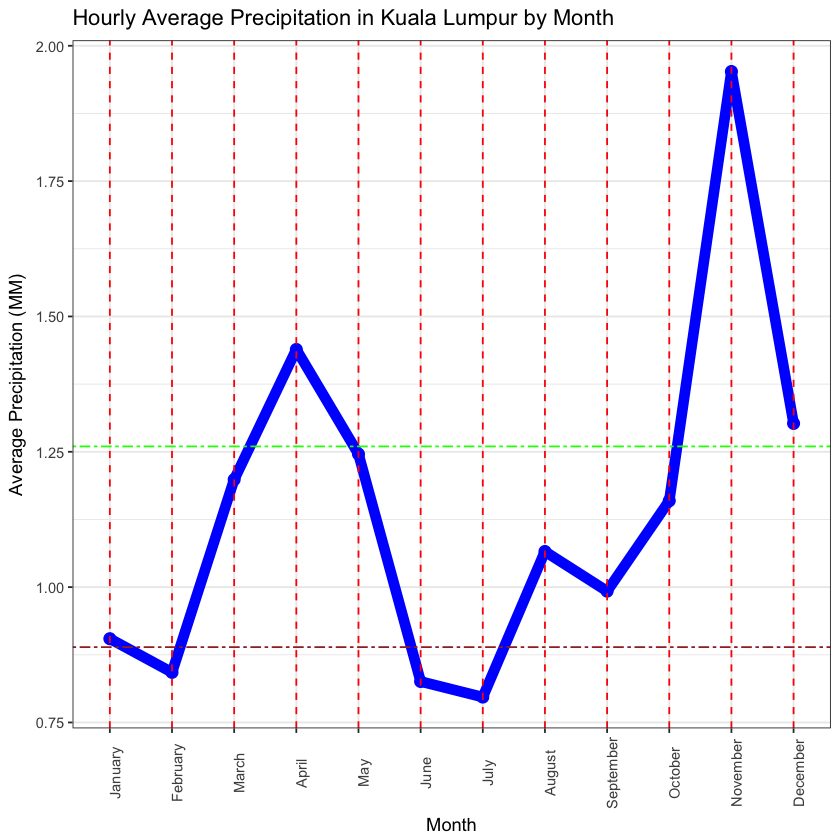

In [6]:
# Your Code Is Here for Question 6
library(dplyr)
library(tidyr)
library(ggplot2)
data_plot = separate(data, 'date', c('year', 'month', 'day'), sep='-')
myd1 = summarise(group_by(data_plot, month), avg=mean(precipMM))
myd1$month = factor(myd1$month)
levels(myd1$month) = c('January','February','March','April',
                       'May','June','July','August','September',
                       'October','November','December')
myd1
g = ggplot(data = myd1, aes(x=month, y=avg))
g = g + geom_point(color='blue', size=3)
g = g + geom_line(color='blue', size=3, group=1)
g = g + geom_vline(xintercept=1:12, linetype='dashed', color='red')
g = g + geom_hline(yintercept=quantile(myd1$avg, 0.25), linetype='twodash', color='brown')
g = g + geom_hline(yintercept=quantile(myd1$avg, 0.75), linetype='twodash', color='green')
g = g + theme_bw()
g = g + theme(axis.text.x = element_text(angle=90))
g = g + labs(x='Month', y='Average Precipitation (MM)', 
             title='Hourly Average Precipitation in Kuala Lumpur by Month')
g
cat('Based on the plot, as determined by the first and third quantiles,\n')
cat('the rainy season is in the months April, November, and December,\n')
cat('and the dry season is in the months February, June, and July.')

# End of Sample Answers